In [1]:
# !pip install --upgrade pip
#!pip install pymoo

In [2]:
# !pip install --upgrade pip

In [3]:
import pymoo

In [4]:
pymoo.__version__

'0.6.1.1'

In [5]:
import numpy as np
import pandas as pd
import pickle

In [6]:
df = pd.read_csv("top_8_features.csv")
df.head()

,delta S,delta x,omega,e1/a,delta H,upper lamda,del r,VEC,Hardness
0,14.703548,0.121763,5283.665760,1.820,-4.504864,5996.595516,0.049517,7.735,473.0
1,14.703548,0.116571,4618.000434,1.911,-5.034848,5707.252374,0.050757,8.008,367.0
2,14.703548,0.124052,4266.914201,1.820,-5.564832,5879.963503,0.050006,7.826,418.0
3,14.703548,0.119375,6103.238979,1.820,-3.908632,5996.595516,0.049517,7.644,423.0
4,12.594051,0.103069,3567.981959,1.844,-6.400612,12284.658130,0.032019,8.058,168.0


In [7]:
df["Hardness"].max()

883.0

In [8]:
# Load the trained model
with open('lgbm.pkl', 'rb') as f:
    clf2 = pickle.load(f)

In [9]:
X = df.drop(columns = ["Hardness"])

In [10]:
# Define the path to your model file
model_path = "lgbm.pkl" # Pick each of the models that you had saved while doing hyperparameter 
# Load the trained model
with open(model_path, 'rb') as f:
    clf2 = pickle.load(f)
# Now you can use clf2 as your loaded model


In [11]:
# Load a specific model (example)
with open('lgbm.pkl', 'rb') as f:
    hardness_model = pickle.load(f)

In [12]:
from pymoo.core.variable import  Real

In [13]:
X.columns

Index(['delta S', 'delta x', 'omega', 'e1/a', 'delta H', 'upper lamda',
       'del r', 'VEC'],
      dtype='object')

In [14]:
df

,delta S,delta x,omega,e1/a,delta H,upper lamda,del r,VEC,Hardness
0,14.703548,0.121763,5283.665760,1.820,-4.504864,5996.595516,0.049517,7.735,473.0
1,14.703548,0.116571,4618.000434,1.911,-5.034848,5707.252374,0.050757,8.008,367.0
2,14.703548,0.124052,4266.914201,1.820,-5.564832,5879.963503,0.050006,7.826,418.0
3,14.703548,0.119375,6103.238979,1.820,-3.908632,5996.595516,0.049517,7.644,423.0
4,12.594051,0.103069,3567.981959,1.844,-6.400612,12284.658130,0.032019,8.058,168.0
...,...,...,...,...,...,...,...,...,...
200,13.346555,0.112353,4006.762823,1.998,-5.028608,4608.793586,0.053813,8.118,420.0
201,13.258838,0.109055,3584.380050,2.002,-5.697328,4936.111748,0.051827,8.372,323.8
202,12.984238,0.106557,3424.513944,2.002,-5.899108,5090.971336,0.050502,8.507,299.2
203,12.267730,0.101627,3247.951756,2.002,-5.971108,5327.028361,0.047989,8.723,279.6


In [15]:

import pandas as pd



# Define the scaling factor
change_pct = 1.2



mixed_variables = {
    "delta S": Real(bounds=(df['delta S'].min(), df['delta S'].max()*change_pct)),
    "delta x": Real(bounds=(df['delta x'].min(), df['delta x'].max()*change_pct)),
    "omega": Real(bounds=(df['omega'].min(), df['omega'].max()*change_pct)),
    "e1/a": Real(bounds=(df['e1/a'].min(), df['e1/a'].max()*change_pct)),
    "delta H": Real(bounds=(df['delta H'].min(), df['delta H'].max()*change_pct)),
    "upper lamda": Real(bounds=(df['upper lamda'].min(), df['upper lamda'].max()*change_pct)),
    "del r": Real(bounds=(df['del r'].min(), df['del r'].max()*change_pct)),
    "VEC": Real(bounds=(df['VEC'].min(), df['VEC'].max()*change_pct)),
}

# Output the mixed_variables dictionary to verify
print(mixed_variables)


{'delta S': <pymoo.core.variable.Real object at 0x000001D6B627EBD0>, 'delta x': <pymoo.core.variable.Real object at 0x000001D6B7A98B90>, 'omega': <pymoo.core.variable.Real object at 0x000001D6B7A99510>, 'e1/a': <pymoo.core.variable.Real object at 0x000001D6B7A99750>, 'delta H': <pymoo.core.variable.Real object at 0x000001D6B7A999D0>, 'upper lamda': <pymoo.core.variable.Real object at 0x000001D6B7A99C50>, 'del r': <pymoo.core.variable.Real object at 0x000001D6B6AA5CD0>, 'VEC': <pymoo.core.variable.Real object at 0x000001D6B7A9A190>}


In [16]:
mixed_variables

{'delta S': <pymoo.core.variable.Real at 0x1d6b627ebd0>,
 'delta x': <pymoo.core.variable.Real at 0x1d6b7a98b90>,
 'omega': <pymoo.core.variable.Real at 0x1d6b7a99510>,
 'e1/a': <pymoo.core.variable.Real at 0x1d6b7a99750>,
 'delta H': <pymoo.core.variable.Real at 0x1d6b7a999d0>,
 'upper lamda': <pymoo.core.variable.Real at 0x1d6b7a99c50>,
 'del r': <pymoo.core.variable.Real at 0x1d6b6aa5cd0>,
 'VEC': <pymoo.core.variable.Real at 0x1d6b7a9a190>}

In [17]:
from pymoo.core.problem import (
                        Problem,           # Vectorized - since most MO algorithms work with populations, this class evaluates a set of solutons at once 
                        ElementwiseProblem # Inherits from the Problem Class, works with a single solution at a time
                               )
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.mixed import MixedVariableMating, MixedVariableSampling, MixedVariableDuplicateElimination


In [18]:
class HighEntropyHardness(Problem):

    def __init__(self, **kwargs):
        super().__init__(vars=mixed_variables, n_obj=1, **kwargs)

    def _evaluate(self, x, out, *args, **kwargs):
        
        # Type conversion for Prediction
        temp_df = pd.DataFrame(list(x))
        
        # Predict hardness using the trained model
        hardness_prediction = hardness_model.predict(temp_df)
        
        # Objective function (assuming minimization; change sign if needed)
        obj1 = -1 * hardness_prediction  # Maximize hardness (use positive sign if minimizing)
        
        out["F"] = np.column_stack([obj1])


In [19]:
# Instantiate the problem
problem = HighEntropyHardness()

# Define the algorithm
algorithm = NSGA2(
    pop_size=500,
    sampling=MixedVariableSampling(),
    mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
    eliminate_duplicates=False
)

# Minimize the problem
res = minimize(problem,
               algorithm,
               ('n_gen', 300),
               verbose=False)

In [20]:
result = pd.DataFrame(list(res.X))
result['Hardness'] = -1*res.F

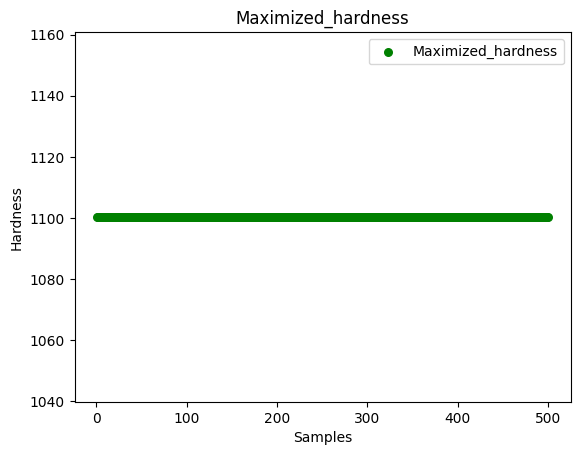

In [21]:
import matplotlib.pyplot as plt

# Assuming 'result' contains the predicted hardness values
Maximized_hardness = result['Hardness']

# Generate indices or sample numbers for plotting (you can adjust this based on your data structure)
indices = range(1, len(result) + 1)

plt.scatter(indices, result["Hardness"], s=30, color="green", label='Maximized_hardness')

plt.xlabel("Samples")
plt.ylabel("Hardness")
plt.title("Maximized_hardness")
plt.legend()
plt.show()


In [22]:
# Assuming 'res' contains the result object from your optimization
best_solution = res.X[np.argmax(res.F[:, 0])]  # Selecting the solution with the maximum objective value

# Convert the best solution to a DataFrame for better visualization
best_solution_df = pd.DataFrame([best_solution], columns=mixed_variables.keys())

# Print or inspect the best solution
print("Best solution (input values):")
print(best_solution_df)



Best solution (input values):
     delta S   delta x        omega      e1/a   delta H  upper lamda  \
0  15.819321  0.108457  3069.424647  1.729413 -7.279152  6344.719441   

      del r       VEC  
0  0.053761  5.598859  


In [23]:
result

,delta S,delta x,omega,e1/a,delta H,upper lamda,del r,VEC,Hardness
0,15.819321,0.108457,3069.424647,1.729413,-7.279152,6344.719441,0.053761,5.598859,1100.314089
1,16.829657,0.103512,4015.926349,1.658993,-6.634724,6882.128613,0.053036,5.556587,1100.314089
2,14.992017,0.106618,3170.822133,1.673581,-7.526711,6894.994091,0.053807,5.676780,1100.314089
3,17.568121,0.111771,2866.116388,1.717081,-6.678287,6339.184335,0.052958,5.753027,1100.314089
4,17.678782,0.101515,2976.177078,1.660279,-6.872809,6322.234055,0.053617,5.554859,1100.314089
...,...,...,...,...,...,...,...,...,...
495,14.862761,0.106961,3425.112833,1.732202,-7.316371,6308.628789,0.053187,5.553400,1100.314089
496,16.792789,0.108442,3314.779948,1.690725,-6.830180,6218.098673,0.053279,5.553465,1100.314089
497,15.423343,0.108499,3683.309193,1.724922,-7.574566,7932.074022,0.053782,5.555466,1100.314089
498,15.956425,0.110041,3434.248858,1.650572,-7.131338,6293.838941,0.053280,5.683778,1100.314089


In [26]:
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga2 import NSGA2


# Instantiate the problem
problem = HighEntropyHardness()

# Define the algorithm
algorithm = NSGA2(
    pop_size=500,
    sampling=MixedVariableSampling(),
    mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
    eliminate_duplicates=False
)

# Callback function to collect results at each iteration
hardness_over_iterations = []

def callback(algorithm):
    # Extract and store hardness value at each iteration
    hardness_over_iterations.append(-algorithm.pop.get("F")[:, 0].min())

# Minimize the problem with the callback
res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               verbose=False,
               callback=callback,
               save_history=False  # We don't need to save the full history for this example
)


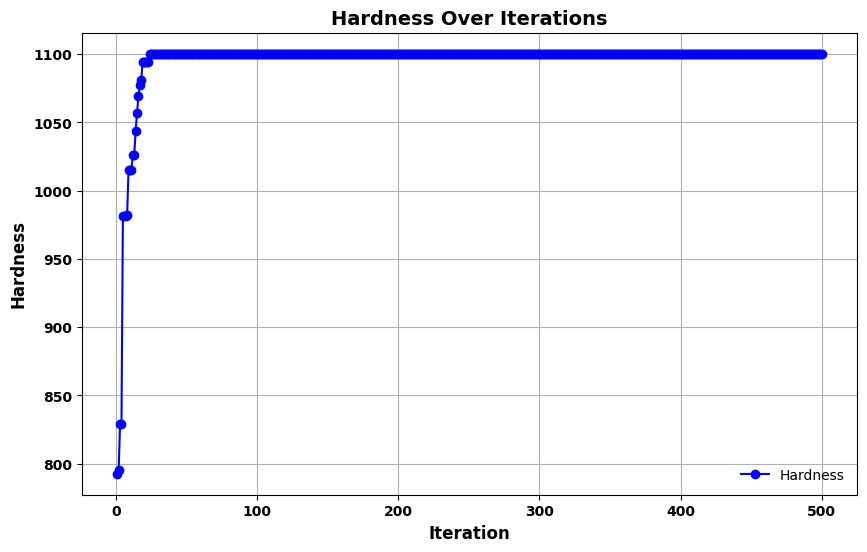

In [25]:
import matplotlib.pyplot as plt

# Generate indices or iteration numbers for plotting
iterations = range(1, len(hardness_over_iterations) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, hardness_over_iterations, marker='o', color='blue', label='Hardness')


#plt.xlabel("Iteration", fontsize=12, fontweight='bold')
#plt.ylabel("Hardness", fontsize=12, fontweight='bold')
#plt.title("Hardness Over Iterations", fontsize=14, fontweight='bold')
#plt.legend(fontsize=10, loc='best', frameon=False).set_visible(True)
#plt.grid(True)
#plt.show()
plt.xlabel("Iteration", fontsize=12, fontweight='bold')
plt.ylabel("Hardness", fontsize=12, fontweight='bold')
plt.title("Hardness Over Iterations", fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best', frameon=False).set_visible(True)
plt.grid(True)

# Make x-axis and y-axis tick labels bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

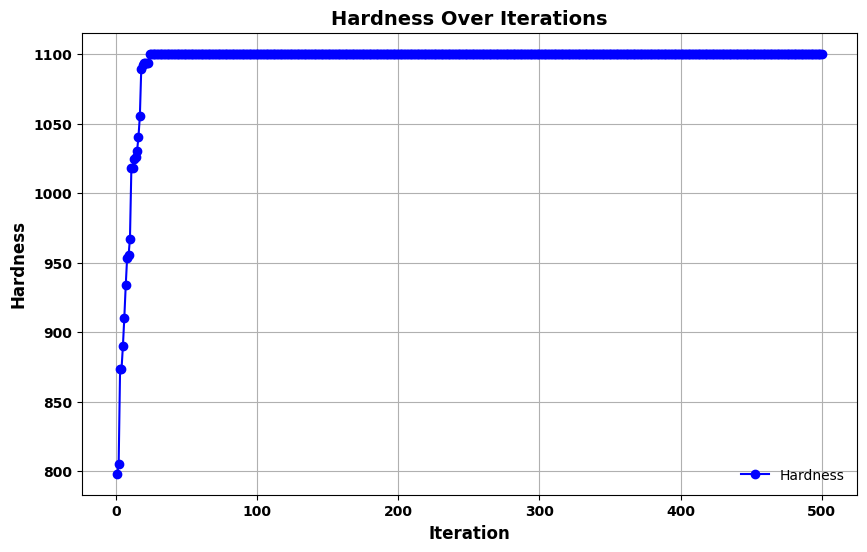

In [27]:
# Plot the convergence
iterations = range(1, len(hardness_over_iterations) + 1)

plt.figure(figsize=(10, 6))
plt.plot(iterations, hardness_over_iterations, marker='o', color='blue', label='Hardness')

plt.xlabel("Iteration", fontsize=12, fontweight='bold')
plt.ylabel("Hardness", fontsize=12, fontweight='bold')
plt.title("Hardness Over Iterations", fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best', frameon=False).set_visible(True)
plt.grid(True)

# Make x-axis and y-axis tick labels bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

In [37]:
# Callback function to collect best objective value at each iteration
best_objective_over_iterations = []

def callback(algorithm):
    # Extract and store the best objective value at each iteration
    best_value = -algorithm.pop.get("F")[:, 0].min()  # Use -F because you are minimizing
    best_objective_over_iterations.append(best_value)


In [38]:
from pymoo.optimize import minimize
from pymoo.algorithms.moo.nsga2 import NSGA2

# Instantiate the problem
problem = HighEntropyHardness()

# Define the algorithm
algorithm = NSGA2(
    pop_size=500,
    sampling=MixedVariableSampling(),
    mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
    eliminate_duplicates=False
)

# Minimize the problem with the callback
res = minimize(problem,
               algorithm,
               ('n_gen', 300),
               verbose=False,
               callback=callback,
               save_history=False)  # We don't need to save the full history for this example


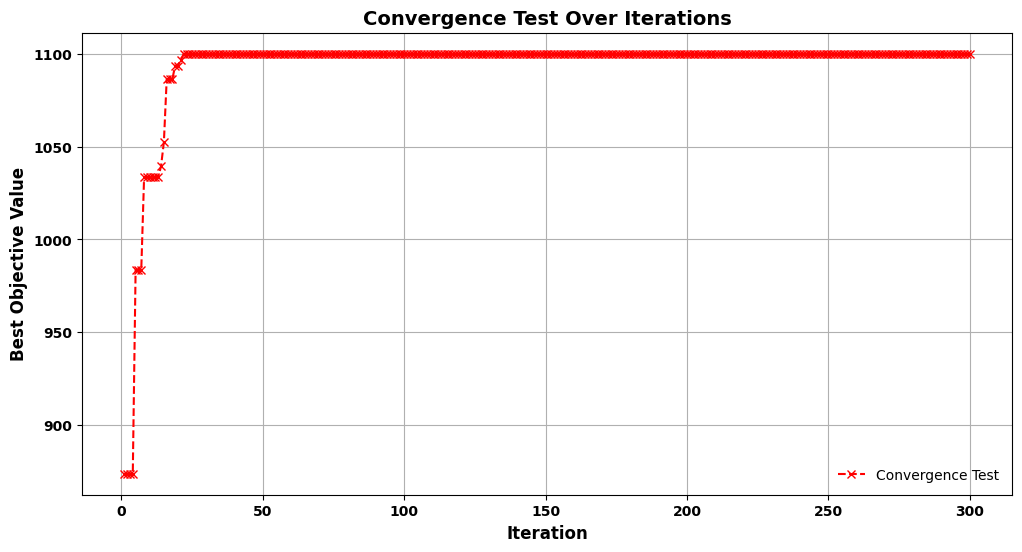

In [39]:
import matplotlib.pyplot as plt

# Generate indices or iteration numbers for plotting
iterations = range(1, len(best_objective_over_iterations) + 1)

# Plot convergence test results
plt.figure(figsize=(12, 6))
plt.plot(iterations, best_objective_over_iterations, marker='x', color='red', linestyle='--', label='Convergence Test')

# Labels and title
plt.xlabel("Iteration", fontsize=12, fontweight='bold')
plt.ylabel("Best Objective Value", fontsize=12, fontweight='bold')
plt.title("Convergence Test Over Iterations", fontsize=14, fontweight='bold')

# Add legend and grid
plt.legend(fontsize=10, loc='best', frameon=False)
plt.grid(True)

# Make x-axis and y-axis tick labels bold
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Show plot
plt.show()


In [41]:
!pip install --upgrade pymoo


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/910.4 kB ? eta -:--:--
   - ------------------------------------- 41.0/910.4 kB 667.8 kB/s eta 0:00:02
   ---- ----------------------------------- 92.2/910.4 kB 1.1 MB/s eta 0:00:01
   ------- -------------------------------- 163.8/910.4 kB 1.2 MB/s eta 0:00:01
   ------------ --------------------------- 276.5/910.4 kB 1.6 MB/s eta 0:00:01
   --------------- ------------------------ 358.4/910.4 kB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 624.6/910.4 kB 2.3 MB/s eta 0:00:01
   ----------------------------------- ---- 819.2/910.4 kB 2.7 MB/s eta 0:00:01
   ---------------------------------------- 910.4/910.4 kB 2.7 MB/s eta 0:00:00
  Attempting uninstall: pymoo
    Found existing installation: pymoo 0.6.1.1
    Uninstalling pymoo-0.6.1.1:
      Successfully uninstalled pymoo-0.6.1.1


DEPRECATION: Loading egg at c:\program files\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
  You can safely remove it manually.

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from pymoo.indicators.hv import HV
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.problem import Problem
from pymoo.core.mixed import MixedVariableSampling, MixedVariableMating, MixedVariableDuplicateElimination
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




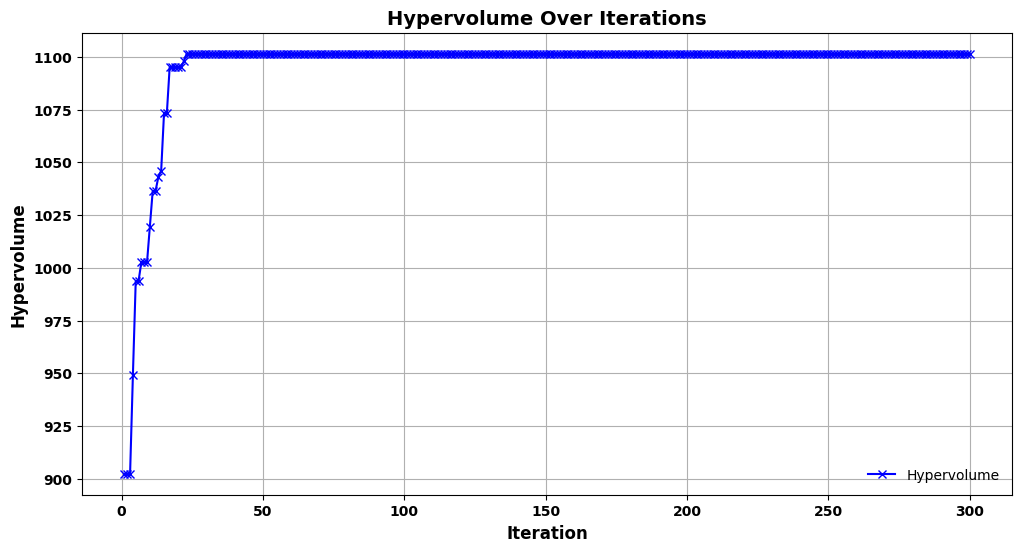

In [44]:
# Define your problem class (replace with your actual problem)
class HighEntropyHardness(Problem):
    def __init__(self, **kwargs):
        super().__init__(vars=mixed_variables, n_obj=1, **kwargs)

    def _evaluate(self, x, out, *args, **kwargs):
        temp_df = pd.DataFrame(list(x))
        hardness_prediction = hardness_model.predict(temp_df)
        obj1 = -1 * hardness_prediction
        out["F"] = np.column_stack([obj1])

# Define a reference point
reference_point = np.array([1.2])  # Modify based on the scale of your objective values

# Initialize Hypervolume indicator
hv = HV(ref_point=reference_point)

# Define the algorithm
algorithm = NSGA2(
    pop_size=500,
    sampling=MixedVariableSampling(),
    mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
    eliminate_duplicates=False
)

# Callback function to collect hypervolume values
hypervolume_over_iterations = []

def callback(algorithm):
    # Get the current Pareto front
    pareto_front = algorithm.pop.get("F")
    
    # Calculate hypervolume
    current_hypervolume = hv(pareto_front)
    hypervolume_over_iterations.append(current_hypervolume)

# Minimize the problem with the callback
res = minimize(problem,
               algorithm,
               ('n_gen', 300),
               verbose=False,
               callback=callback,
               save_history=False)

# Plot hypervolume over iterations
iterations = range(1, len(hypervolume_over_iterations) + 1)
plt.figure(figsize=(12, 6))
plt.plot(iterations, hypervolume_over_iterations, marker='x', color='blue', linestyle='-', label='Hypervolume')
plt.xlabel("Iteration", fontsize=12, fontweight='bold')
plt.ylabel("Hypervolume", fontsize=12, fontweight='bold')
plt.title("Hypervolume Over Iterations", fontsize=14, fontweight='bold')
plt.legend(fontsize=10, loc='best', frameon=False)
plt.grid(True)
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

HV Test


In [52]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.indicators.hv import Hypervolume
from pymoo.core.mixed import MixedVariableSampling, MixedVariableMating, MixedVariableDuplicateElimination


In [53]:
# Define the problem
class HighEntropyHardness(Problem):
    def __init__(self, **kwargs):
        super().__init__(vars=mixed_variables, n_obj=1, **kwargs)

    def _evaluate(self, x, out, *args, **kwargs):
        # Type conversion for Prediction
        temp_df = pd.DataFrame(list(x), columns=mixed_variables.keys())
        
        # Predict hardness using the trained model
        hardness_prediction = hardness_model.predict(temp_df)
        
        # Objective function (assuming minimization; change sign if needed)
        obj1 = -1 * hardness_prediction  # Maximize hardness (use positive sign if minimizing)
        
        out["F"] = np.column_stack([obj1])

In [54]:
# Instantiate the problem
problem = HighEntropyHardness()

# Define the algorithm
algorithm = NSGA2(
    pop_size=500,
    sampling=MixedVariableSampling(),
    mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
    eliminate_duplicates=False
)

# Minimize the problem
res = minimize(problem,
               algorithm,
               ('n_gen', 300),
               verbose=False,
               save_history=True)


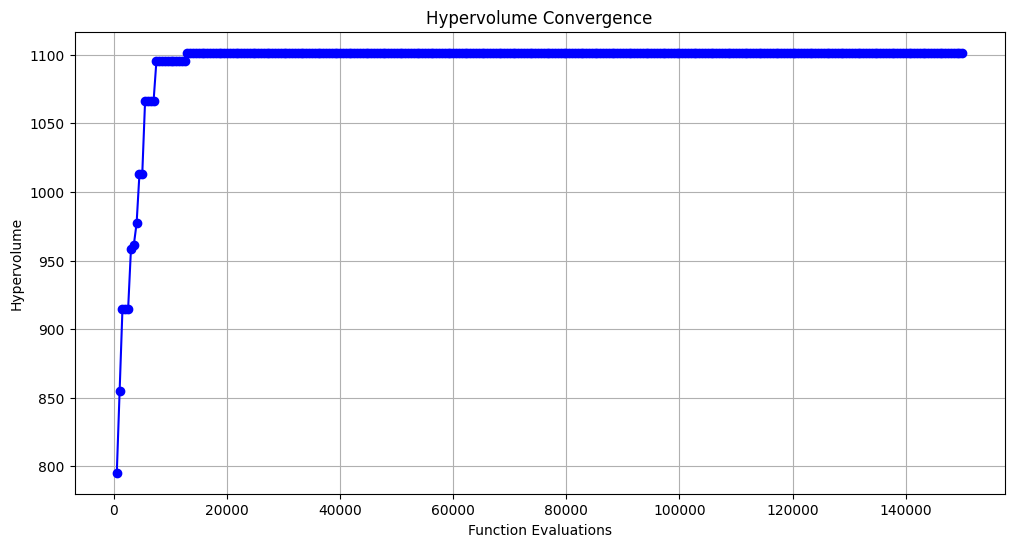

In [55]:
# Extract results
hist = res.history
n_evals = []  # Number of function evaluations
hist_F = []  # Objective space values
hv_values = []  # Hypervolume values

# Define reference point
ref_point = np.array([1.2])  # Adjust based on your problem

# Create Hypervolume indicator
hv_indicator = Hypervolume(ref_point=ref_point)

# Iterate through history
for algo in hist:
    n_evals.append(algo.evaluator.n_eval)
    
    # Get objectives
    objectives = algo.opt.get("F")
    
    # Compute hypervolume
    hv = hv_indicator.do(objectives)
    hv_values.append(hv)

# Plot Hypervolume over Function Evaluations
plt.figure(figsize=(12, 6))
plt.plot(n_evals, hv_values, marker='o', linestyle='-', color='blue')
plt.xlabel('Function Evaluations')
plt.ylabel('Hypervolume')
plt.title('Hypervolume Convergence')
plt.grid(True)
plt.show()


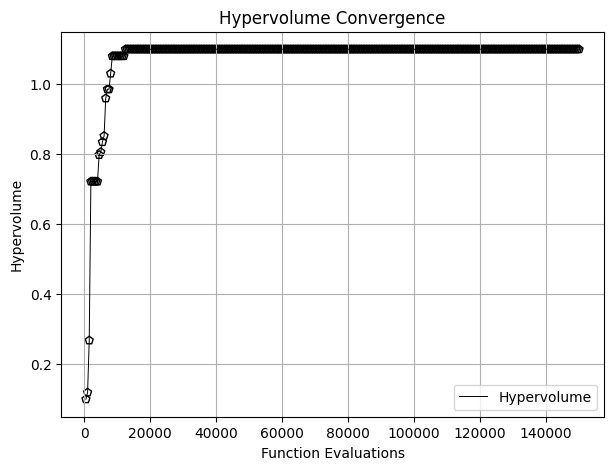

In [58]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pymoo.core.problem import Problem
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.core.mixed import MixedVariableSampling, MixedVariableMating, MixedVariableDuplicateElimination
from pymoo.core.variable import Real
from pymoo.indicators.hv import Hypervolume

# Load the trained model
model_path = "lgbm.pkl"
with open(model_path, 'rb') as f:
    hardness_model = pickle.load(f)

# Define the scaling factor
change_pct = 1.2

# Define mixed variables
mixed_variables = {
    "delta S": Real(bounds=(df['delta S'].min(), df['delta S'].max()*change_pct)),
    "delta x": Real(bounds=(df['delta x'].min(), df['delta x'].max()*change_pct)),
    "omega": Real(bounds=(df['omega'].min(), df['omega'].max()*change_pct)),
    "e1/a": Real(bounds=(df['e1/a'].min(), df['e1/a'].max()*change_pct)),
    "delta H": Real(bounds=(df['delta H'].min(), df['delta H'].max()*change_pct)),
    "upper lamda": Real(bounds=(df['upper lamda'].min(), df['upper lamda'].max()*change_pct)),
    "del r": Real(bounds=(df['del r'].min(), df['del r'].max()*change_pct)),
    "VEC": Real(bounds=(df['VEC'].min(), df['VEC'].max()*change_pct)),
}

# Define the problem
class HighEntropyHardness(Problem):
    def __init__(self, **kwargs):
        super().__init__(vars=mixed_variables, n_obj=1, **kwargs)

    def _evaluate(self, x, out, *args, **kwargs):
        # Type conversion for Prediction
        temp_df = pd.DataFrame(list(x), columns=mixed_variables.keys())
        
        # Predict hardness using the trained model
        hardness_prediction = hardness_model.predict(temp_df)
        
        # Objective function (assuming minimization; change sign if needed)
        obj1 = -1 * hardness_prediction  # Maximize hardness (use positive sign if minimizing)
        
        out["F"] = np.column_stack([obj1])

# Instantiate the problem
problem = HighEntropyHardness()

# Define the algorithm
algorithm = NSGA2(
    pop_size=500,
    sampling=MixedVariableSampling(),
    mating=MixedVariableMating(eliminate_duplicates=MixedVariableDuplicateElimination()),
    eliminate_duplicates=False
)

# Minimize the problem
res = minimize(problem,
               algorithm,
               ('n_gen', 300),
               verbose=False,
               save_history=True)

# Extract results
hist = res.history
n_evals = []  # Number of function evaluations
hist_F = []  # Objective space values

# Collect data for hypervolume calculation
for algo in hist:
    n_evals.append(algo.evaluator.n_eval)
    hist_F.append(algo.opt.get("F"))

# Define approximate ideal and nadir points
approx_ideal = np.min([np.min(f, axis=0) for f in hist_F], axis=0)
approx_nadir = np.max([np.max(f, axis=0) for f in hist_F], axis=0)

# Define Hypervolume metric
metric = Hypervolume(ref_point=np.array([1.1]),  # Adjust as needed
                     norm_ref_point=False,
                     zero_to_one=True,
                     ideal=approx_ideal,
                     nadir=approx_nadir)

# Collect Hypervolume values
hv = [metric.do(f) for f in hist_F]

# Plot Hypervolume over Function Evaluations
plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv, color='black', lw=0.7, label="Hypervolume")
plt.scatter(n_evals, hv, facecolor="none", edgecolor='black', marker="p")
plt.title("Hypervolume Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.legend()
plt.grid(True)
plt.show()


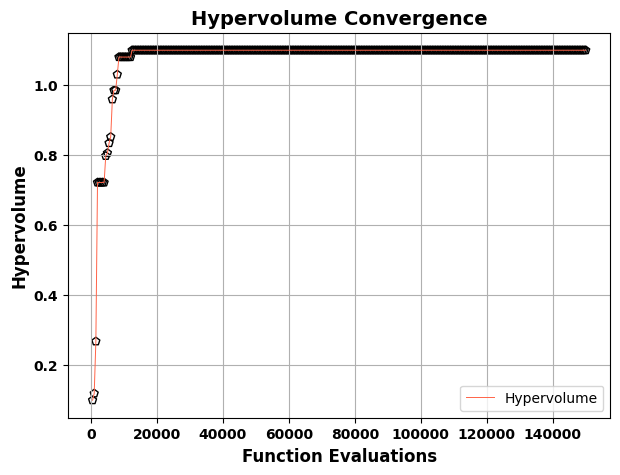

In [62]:
import matplotlib.pyplot as plt

# Plot Hypervolume over Function Evaluations
plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv, color='tomato', lw=0.7, label="Hypervolume")
plt.scatter(n_evals, hv, facecolor="none", edgecolor='black', marker="p")
plt.title("Hypervolume Convergence", fontsize=14, fontweight='bold')
plt.xlabel("Function Evaluations", fontsize=12, fontweight='bold')
plt.ylabel("Hypervolume", fontsize=12, fontweight='bold')

# Make x and y ticks bold and increase font size
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.legend()
plt.grid(True)
plt.show()
